**PHASE 3 PROJECT**

**SYRIATEL CUSTOMER CHURN**

Student: Lilian Ngige

**Project Overview**

The project aims at analysing SyriaTel data and building models that predict whether a customer will churn or not.

**Business Problem**

SyriaTel, a telecommunications company, is facing the challenge of customer churn. The company wants to predict whether a customer is likely to stop doing business with them in the near future. Reducing customer churn is essential for maintaining revenue and profitability.

**Project Objective**

Build a binary classification model to predict customer churn.
The model will identify customers who are likely to churn, to enable SyriaTel to take proactive measures to retain them.

In [4]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
# install imblearn library
!pip install imbalanced-learn

**Loading Data**

In [8]:
df=pd.read_csv("C:/Users/Dell/Desktop/PHASE 3_Churn_Data _set/SyriaTel_data_set.csv")

**Data understanding & Exploration**

In [9]:
#  Exploring the first top rows of the data
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# checking overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
# checking for statistical summary of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
#Identifying the target variable
print(df['churn'].unique())
#Target variable = Churn

[False  True]


 **Data Preprocessing and Cleaning**

In [14]:
#Getting count of missing values in the data
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [15]:
# finding the colleration of the features to target variable
correlation_matrix = df.corr()
target_correlation = correlation_matrix['churn'].abs().sort_values(ascending=False)
target_correlation

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64

### Encoding of  categorical variables 

In [16]:


#Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Display the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [17]:
#Perform one-hot encoding for categorical variables
df= pd.get_dummies(df, columns=categorical_columns)


In [18]:
# Split the data into features (X) and the target variable (y)

X = df.drop('churn',axis=1)  # X contains all columns except 'churn'
y =df['churn']  # y is the 'churn' column

In [19]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [20]:
# preview of X_train
X_train.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
1066,117,510,25,216.0,140,36.72,224.1,69,19.05,267.9,...,0,0,0,0,0,0,1,0,0,1
1553,86,415,0,217.8,93,37.03,214.7,95,18.25,228.7,...,0,0,0,0,0,0,1,0,1,0
2628,37,415,0,221.0,126,37.57,204.5,110,17.38,118.0,...,0,0,0,0,0,0,1,0,1,0
882,130,415,0,162.8,113,27.68,290.3,111,24.68,114.9,...,0,0,0,0,0,0,1,0,1,0
984,77,415,0,142.3,112,24.19,306.3,111,26.04,196.5,...,0,0,0,0,0,0,1,0,1,0


**Exploratory data analysis**

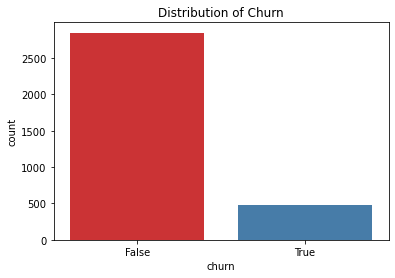

In [22]:
#Visualize the distribution of the target variable "churn"
plt.figure(figsize=(6, 4))
sns.countplot(df['churn'], palette='Set1')
plt.title("Distribution of Churn")
plt.show()

In [23]:
#Exploring the columns for Training_data
column_names = df.columns
#Target variable
#our target variable is churn
df['churn'].value_counts()  


False    2850
True      483
Name: churn, dtype: int64

In [24]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

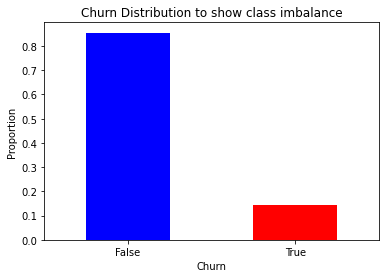

In [25]:
# Create a bar plot for the churn distribution
churn_counts = df['churn'].value_counts(normalize=True)
churn_counts.plot(kind='bar', color=['blue', 'red'])

# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.title('Churn Distribution to show class imbalance')

# Set custom labels for the x-axis (True and False)
plt.xticks([0, 1], ['False', 'True'], rotation=0)

# Show the plot
plt.show()

The data set contains 333 entries and 21 columns, with the target variable being churn. This dataset has some class imbalances that would have to be addressed during modeling.This is binary dataset, one class false takes up 86% of the dataset while false is only 14.4%.

In [27]:
#working on the class imbalance , import smote

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X, y)

In [28]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts(normalize=True)) 


True     0.5
False    0.5
Name: churn, dtype: float64


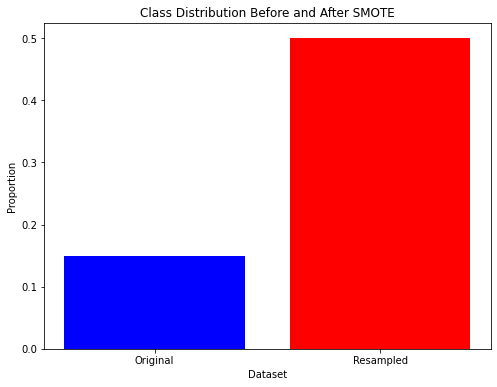

In [29]:
# Calculate the class distribution after SMOTE
churn_counts_resampled = y_train_resampled.value_counts(normalize=True)
churn_counts_original = y_train.value_counts(normalize=True)

# Create a bar plot to compare the original and resampled class distributions
plt.figure(figsize=(8, 6))
plt.bar(['Original', 'Resampled'], [churn_counts_original[1], churn_counts_resampled[1]], color=['blue', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Proportion')
plt.title('Class Distribution Before and After SMOTE')
plt.show()


In [30]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.25, random_state=12)
# Preview synthetic sample class distribution
#print(pd.Series(y_train_resampled).value_counts())

In [31]:
# SMOTE not applied to test data
y_test.value_counts()

True     738
False    687
Name: churn, dtype: int64

## Model Building

### Logistic Regression

In [32]:
# Create and fit a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [34]:
# Make predictions on the test set
y_pred_logistic = log_reg.predict(X_test)



In [35]:
#Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.70      0.70       687
        True       0.72      0.71      0.71       738

    accuracy                           0.71      1425
   macro avg       0.70      0.71      0.71      1425
weighted avg       0.71      0.71      0.71      1425



 The accuracy of the model is 71%, meaning it correctly classifies approximately 71% of the instances in the test dataset.

The precision for the "True" class (churned customers) is 0.72, This indicates that the model correctly predicts both classes without much difference precision as false class is 0.69

TThe F1-score is the harmonic mean of precision and recall. For both classes, the F1-score is approximately 0.71, which is consistent with the overall accuracy.

The Logistic Regression model achieves a balanced performance for both classes, with similar precision, recall, and F1-scores. It correctly identifies churned and non-churned customers with relatively consistent accuracy.

Logistic Regression model provides a balanced performance, the relatively lower accuracy compared to other models justifies the exploration of more complex models to potentially improve predictive performance.


**Random Forest**

In [36]:
# Create and fit a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", classification_rep_rf)

Random Forest Results:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96       687
        True       0.97      0.96      0.96       738

    accuracy                           0.96      1425
   macro avg       0.96      0.96      0.96      1425
weighted avg       0.96      0.96      0.96      1425



The accuracy of the Random Forest model is exceptionally high at 96%, indicating that it correctly classifies approximately 96% of the instances in the test dataset.

For both the "True" (churned customers) and "False" (non-churned customers) classes, precision is approximately 0.97, indicating that the model correctly predicts both classes with high precision.

Recall (sensitivity) measures the ratio of true positive predictions to the total actual positives. For both classes, recall is also high, at approximately 0.96 and 0.97. This suggests that the model captures true positives for both classes very well.

The F1-score is the harmonic mean of precision and recall. For both classes, the F1-score is approximately 0.96, indicating an excellent balance between precision and recall.


### Model with Hyperparameter Tuning (Decision tree)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}
# Create a grid search object with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'])

# Train the model with the best hyperparameters
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))







Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Accuracy: 0.9192982456140351
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.96      0.92       687
        True       0.96      0.88      0.92       738

    accuracy                           0.92      1425
   macro avg       0.92      0.92      0.92      1425
weighted avg       0.92      0.92      0.92      1425



The model achieves an accuracy of 91%. This indicates that the model correctly predicts customer churn or retention 91% of the time.

Precision is 0.89. This means that when the model predicts a customer won't churn, it is correct 89% of the time.

For the "True" class (churners), precision is 0.96. This indicates that when the model predicts a customer will churn, it is correct 96% of the time. High precision is essential for minimizing false positive predictions.


**Model Evaluation and Comparison**

Comparison of the performance of the three models.

Best-performing model in terms of accuracy and other relevant metrics.

In [38]:

#Best-performing model in terms of accuracy and other relevant metrics
#Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
random_forest_model = RandomForestClassifier()
# Fit the best model to the data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Best Model Evaluation Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
ROC AUC Score: 0.96


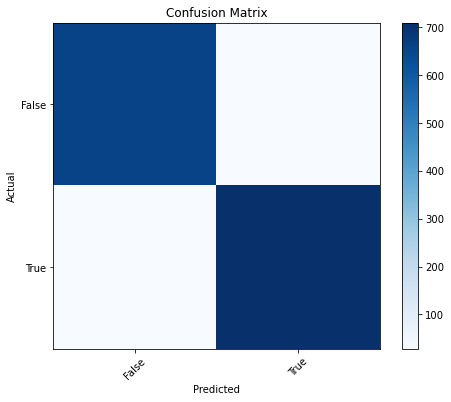

In [47]:
from sklearn.metrics import confusion_matrix
# Define 'classes' as the unique classes in your target variable (e.g., y_test)
classes = sorted(set(y_test))

# Generate the confusion matrix for your model
cm = confusion_matrix(y_test,random_forest_model.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random forest is the best model

#### Model Performance Evaluation

In [48]:
# Model selection and hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)

In [49]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate model performance metrics: accuracy, precision, recall, and F1-score.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :return: Dictionary of metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Return as a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Dictionary to hold the results
results = {}

# For each model
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    metrics_test = calculate_metrics(y_test, y_pred_test)
    metrics_train = calculate_metrics(y_train, y_pred_train)
    
    # Store the results
    results[(model_name, 'Test')] = metrics_test
    results[(model_name, 'Train')] = metrics_train

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.702456   0.720506  0.695122  0.707586
                    Train  0.711813   0.704461  0.717803  0.711069
Random Forest       Test   0.980351   0.993056  0.968835  0.980796
                    Train  0.976374   0.991687  0.960227  0.975704
Gradient Boosting   Test   0.926316   0.968889  0.886179  0.925690
                    Train  0.925146   0.952069  0.893466  0.921837

In [50]:
# Create a dataframe of feature importances 
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 
                                    'importance': random_forest_model.feature_importances_}).\
                                    sort_values('importance', ascending = False)


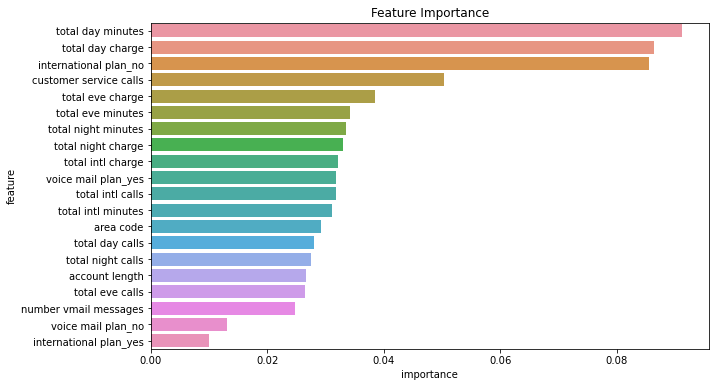

In [51]:
#plot a feature importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances[:20])
plt.title("Feature Importance")
plt.show()


We can see from this feature importance graph that there are several features that the model is weighing more heavily:
- Customer_service_calls
- Total_charge(Total amount spent by the customer)
- Voice mail plan
- International_plan
- Area Code

## Conclusion

The metrics indicate that the churn prediction models are performing commendably, with Random Forest emerging as the top performer, boasting an accuracy of 97% and a recall of 96%.
Considering the provided test metrics, the Random Forest model appears to outperform the other models in terms of accuracy, precision, recall, and F1-score. It achieves the highest test accuracy, precision, and F1-score, as well as a high test recall. This suggests that the Random Forest model is effective in making accurate predictions with a good balance between precision and recall.

Overall, the high-performing model can help the telecom company proactively address customer churn, potentially saving revenue and improving customer satisfaction

**Recommendation**


Churn Analysis
•	Regularly review churn data to identify patterns, reasons, and trends to make more informed decisions.